In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.style.use('ggplot')

In [3]:
import pandas as pd

In [4]:
baseline = pd.read_table("baseline.tsv")
intvector = pd.read_table("intvector.tsv")
bench = pd.concat([baseline, intvector])

In [5]:
bench.type = map(lambda s: s.split(".")[-1], bench.type)
bench["absttype"] = map(lambda s: s.split("{")[0], bench.type)

In [6]:
figsize(12, 8)

In [7]:
def plot_bench(name, eltype):
    bench[(bench.absttype == "IntArray") & (bench.eltype == eltype)]\
        .pivot(index="w", columns="absttype", values="bench_" + name)\
        .plot(style="o-", legend=False)
    baseline = bench.ix[
        (bench.absttype == "Array") & (bench.eltype == eltype),
        "bench_" + name]
    axhline(float(baseline), linestyle="--", label="Array (baseline)")
    title("{} ({})".format(name, eltype))
    ylim(ymin=0)
    ylabel("sec / op")
    #grid()
    legend(loc="upper left")
    savefig("{}_{}.png".format(name, eltype))

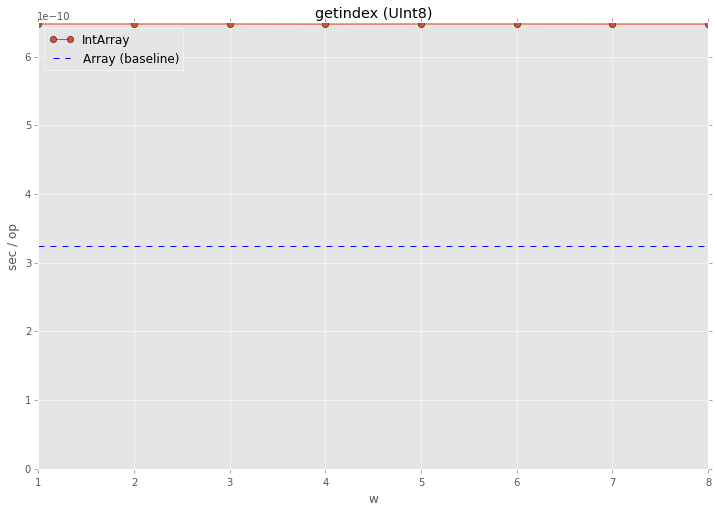

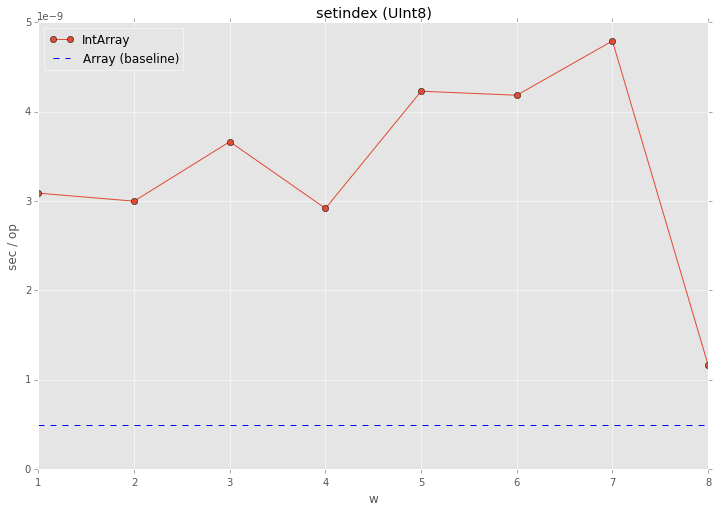

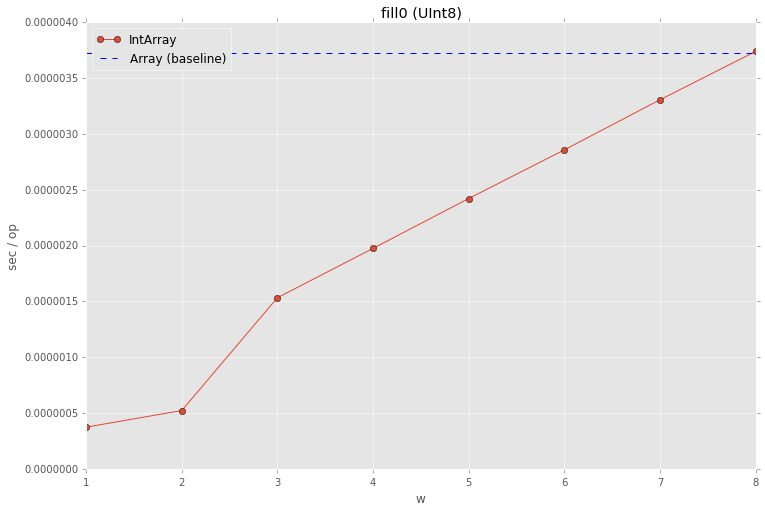

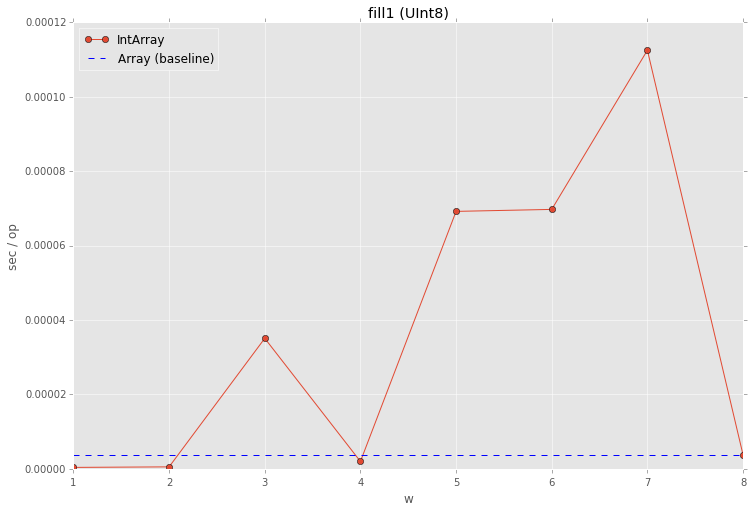

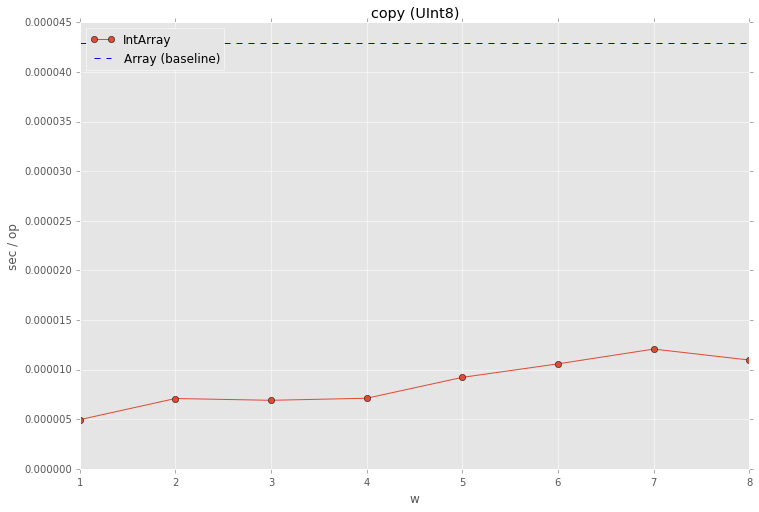

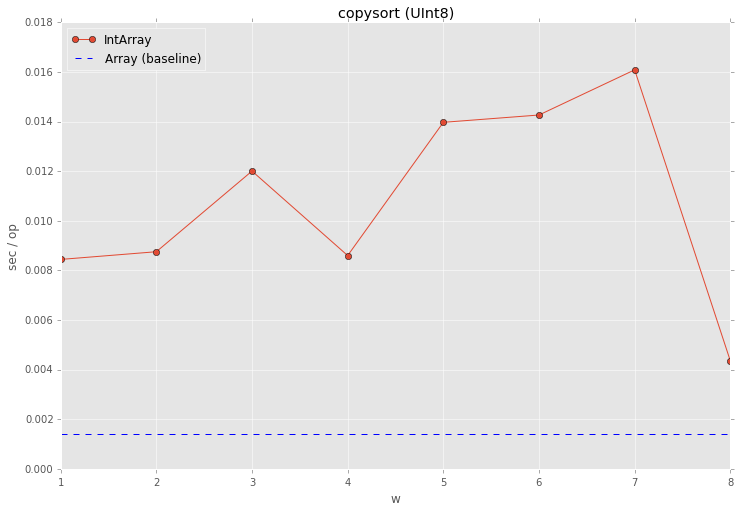

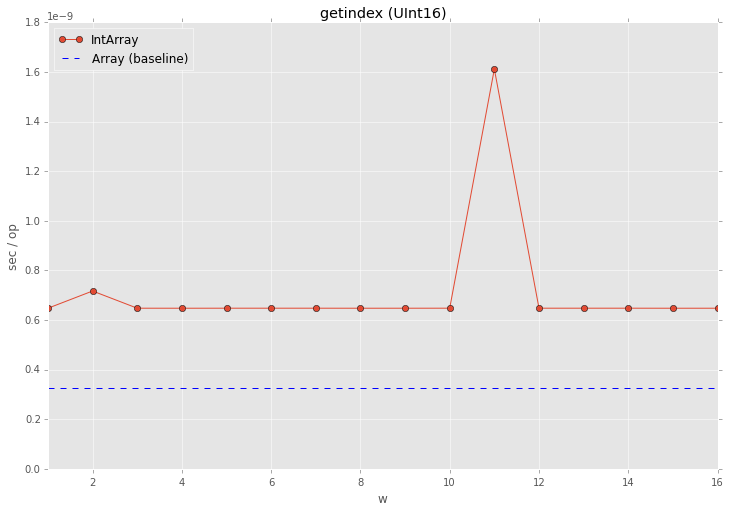

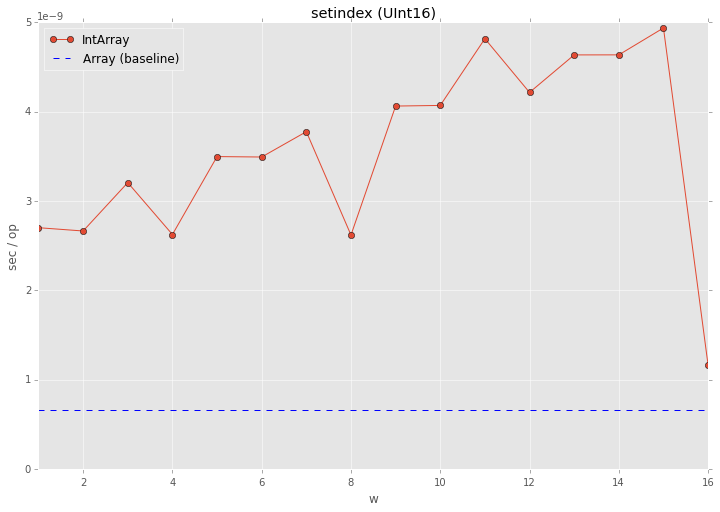

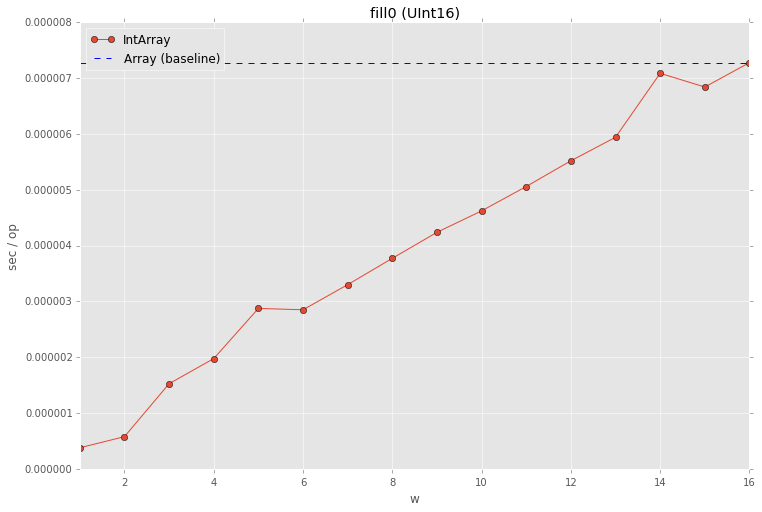

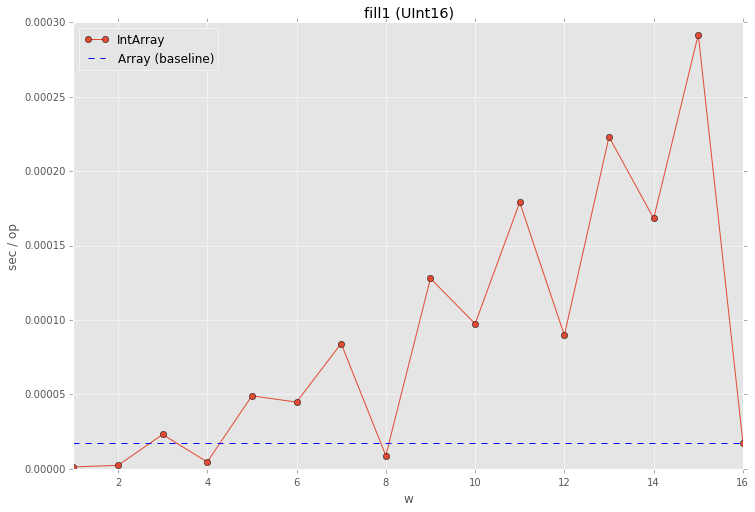

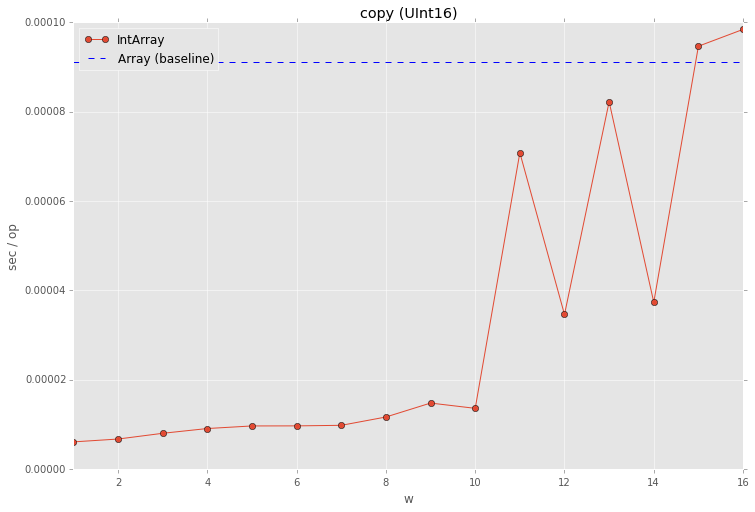

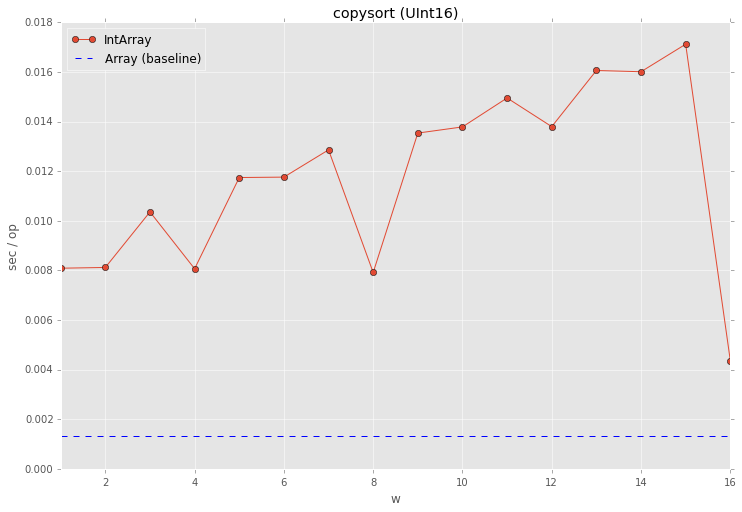

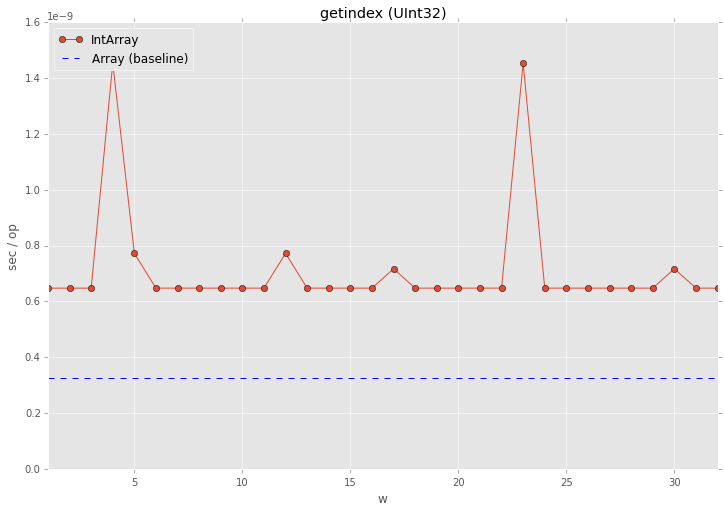

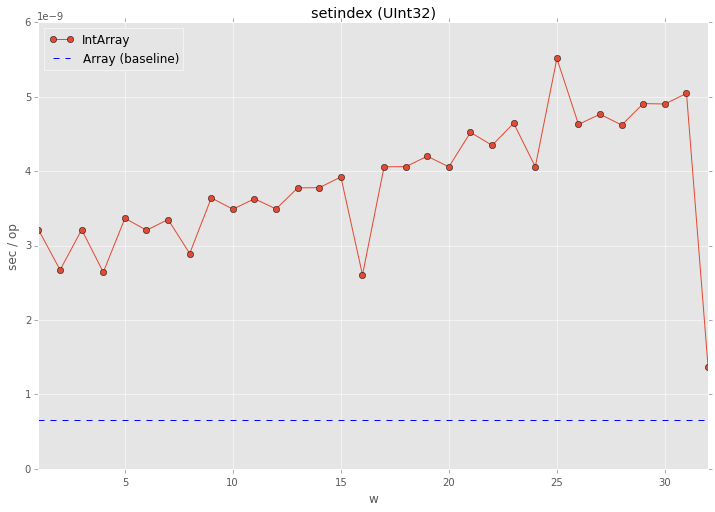

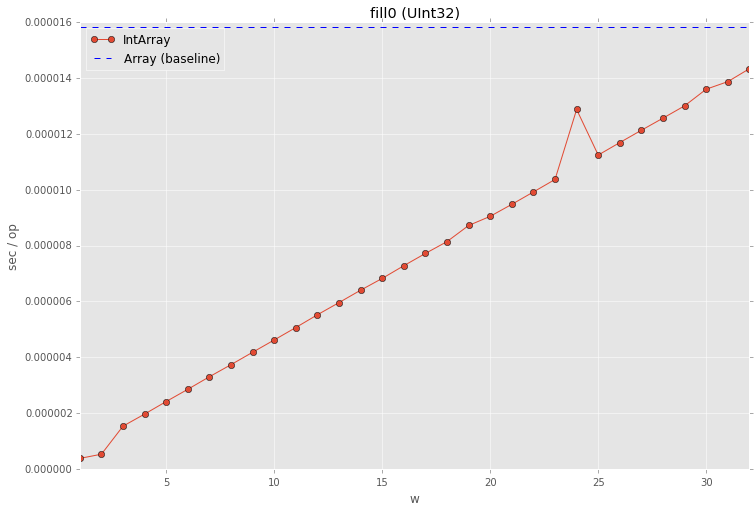

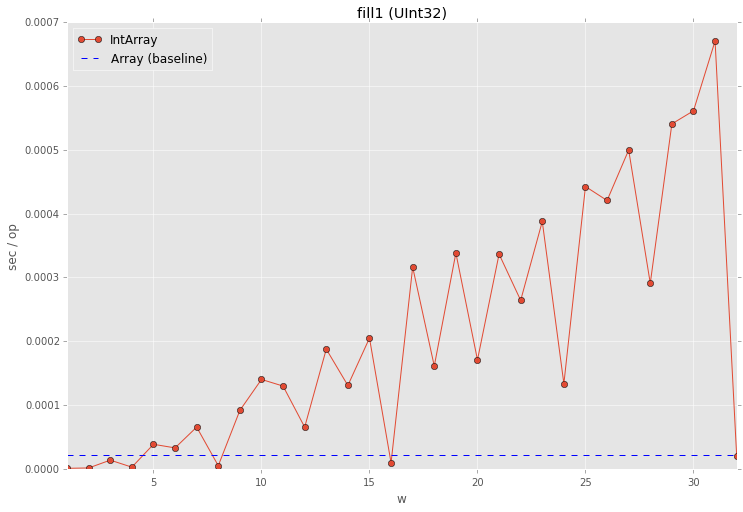

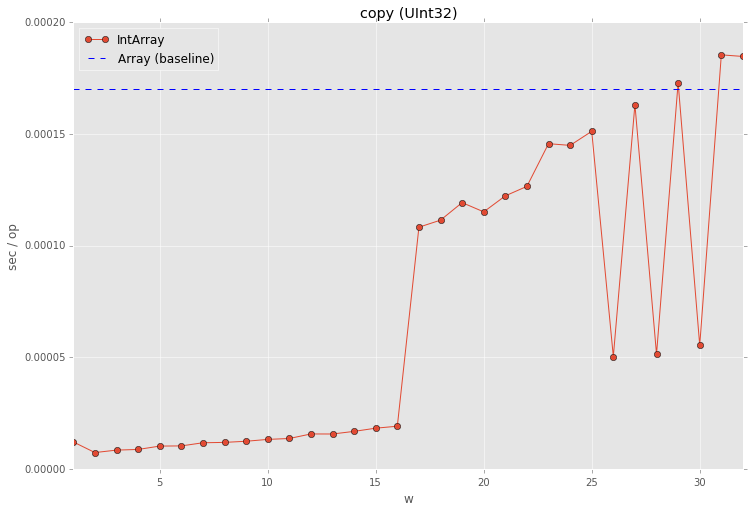

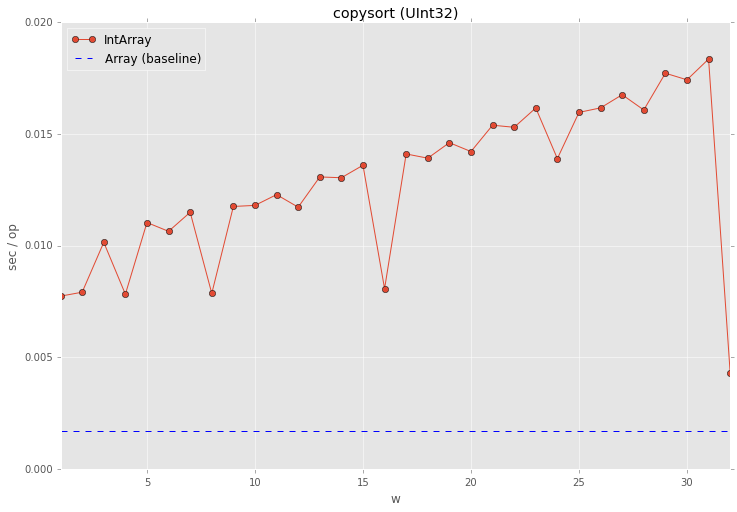

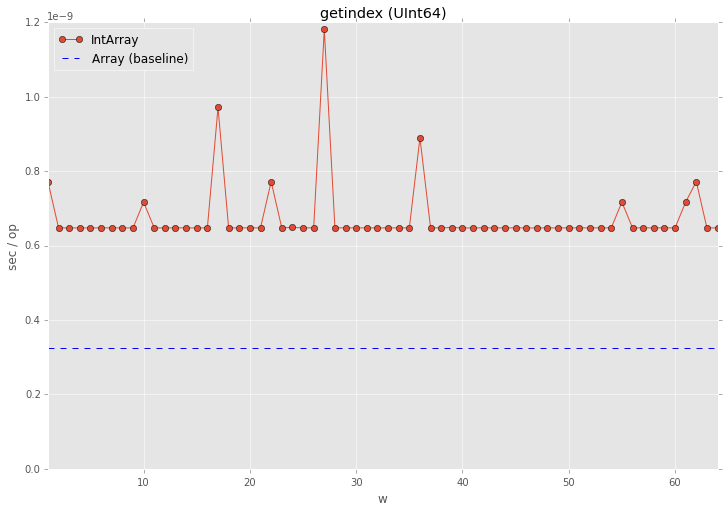

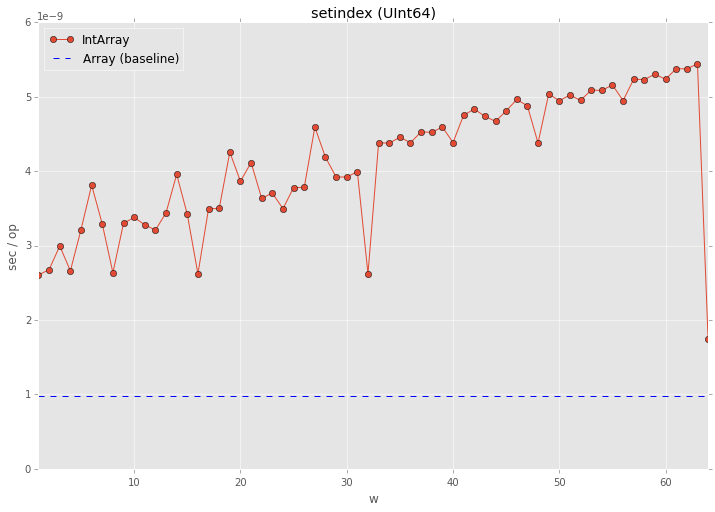

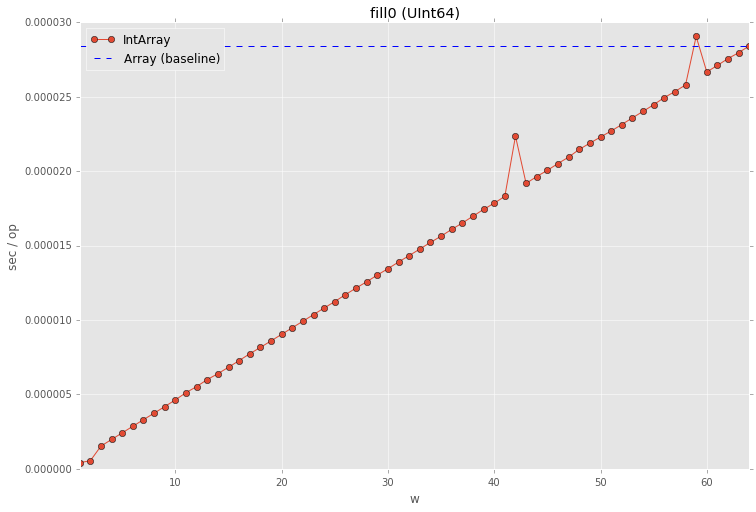

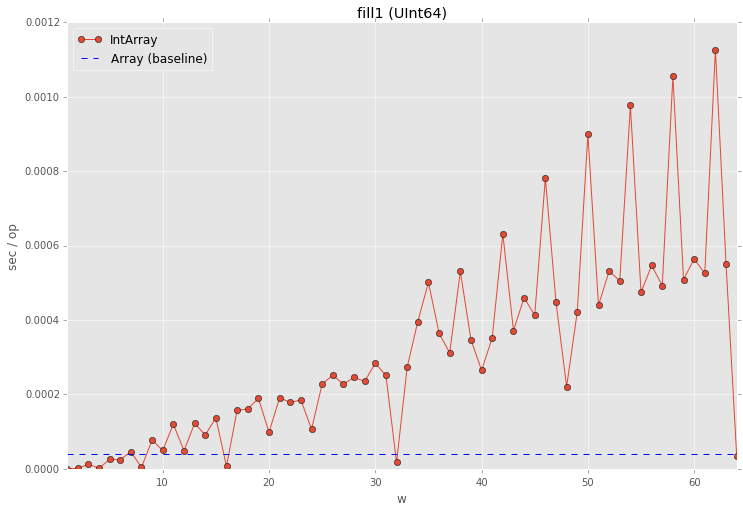

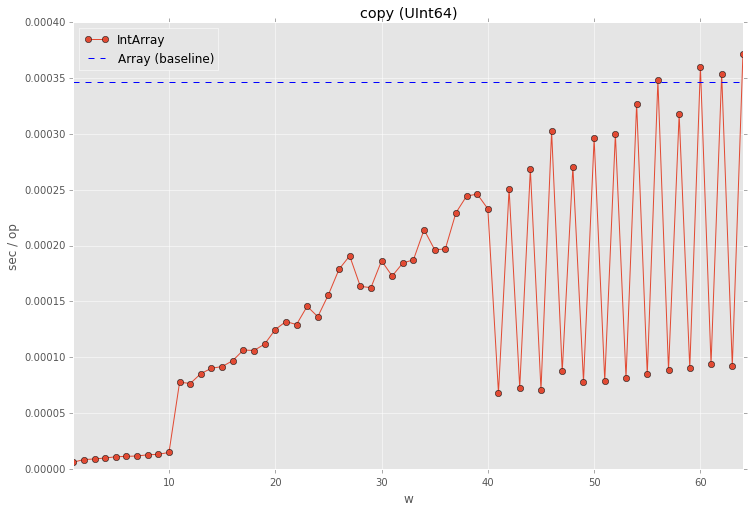

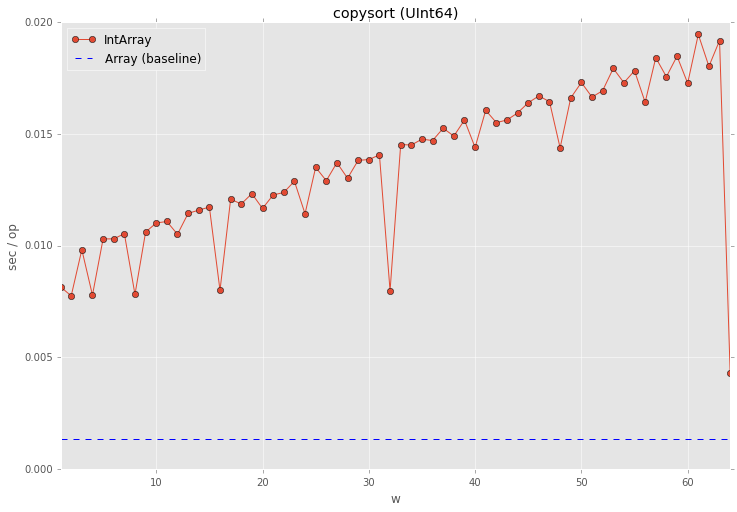

In [8]:
for eltype in ["UInt8", "UInt16", "UInt32", "UInt64"]:
    for name in ["getindex", "setindex", "fill0", "fill1", "copy", "copysort"]:
        plot_bench(name, eltype)
        show()

In [9]:
pd.options.display.max_rows = 1000

In [10]:
bench.columns

Index([u'bench_copy', u'bench_copysort', u'bench_fill0', u'bench_fill1',
       u'bench_getindex', u'bench_setindex', u'eltype', u'type', u'w',
       u'absttype'],
      dtype='object')

In [11]:
baseline

,type,eltype,bench_getindex,bench_setindex,bench_fill0,bench_fill1,bench_copy,bench_copysort
0,"Array{UInt8,1}",UInt8,3.249600e-10,4.919100e-10,0.000004,0.000004,0.000043,0.001423
1,"Array{UInt16,1}",UInt16,3.249700e-10,6.546900e-10,0.000007,0.000017,0.000091,0.001311
2,"Array{UInt32,1}",UInt32,3.250100e-10,6.561600e-10,0.000016,0.000022,0.000170,0.001673
3,"Array{UInt64,1}",UInt64,3.249900e-10,9.778400e-10,0.000028,0.000039,0.000347,0.001354


In [12]:
intvector

,type,eltype,w,bench_getindex,bench_setindex,bench_fill0,bench_fill1,bench_copy,bench_copysort
0,"IntArrays.IntArray{1,UInt8,1}",UInt8,1,6.475900e-10,3.087220e-09,3.730000e-07,3.750000e-07,0.000005,0.008443
1,"IntArrays.IntArray{2,UInt8,1}",UInt8,2,6.476200e-10,2.997860e-09,5.220000e-07,5.210000e-07,0.000007,0.008753
2,"IntArrays.IntArray{3,UInt8,1}",UInt8,3,6.476300e-10,3.663940e-09,1.533000e-06,3.507300e-05,0.000007,0.012005
3,"IntArrays.IntArray{4,UInt8,1}",UInt8,4,6.474600e-10,2.916480e-09,1.975000e-06,1.969000e-06,0.000007,0.008599
4,"IntArrays.IntArray{5,UInt8,1}",UInt8,5,6.476300e-10,4.229120e-09,2.422000e-06,6.919800e-05,0.000009,0.013971
5,"IntArrays.IntArray{6,UInt8,1}",UInt8,6,6.476300e-10,4.184060e-09,2.858000e-06,6.973200e-05,0.000011,0.014266
6,"IntArrays.IntArray{7,UInt8,1}",UInt8,7,6.475400e-10,4.792410e-09,3.307000e-06,1.125160e-04,0.000012,0.016087
7,"IntArrays.IntArray{8,UInt8,1}",UInt8,8,6.475100e-10,1.162300e-09,3.740000e-06,3.739000e-06,0.000011,0.004355
8,"IntArrays.IntArray{1,UInt16,1}",UInt16,1,6.474600e-10,2.700520e-09,3.770000e-07,1.265000e-06,0.000006,0.008088
9,"IntArrays.IntArray{2,UInt16,1}",UInt16,2,7.169000e-10,2.663660e-09,5.760000e-07,2.304000e-06,0.000007,0.008119
